In [25]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tqdm import tqdm

import missingno as msno

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Patient_Data.csv')
data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [3]:
data.shape

(91713, 186)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [5]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

In [6]:
data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91711,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

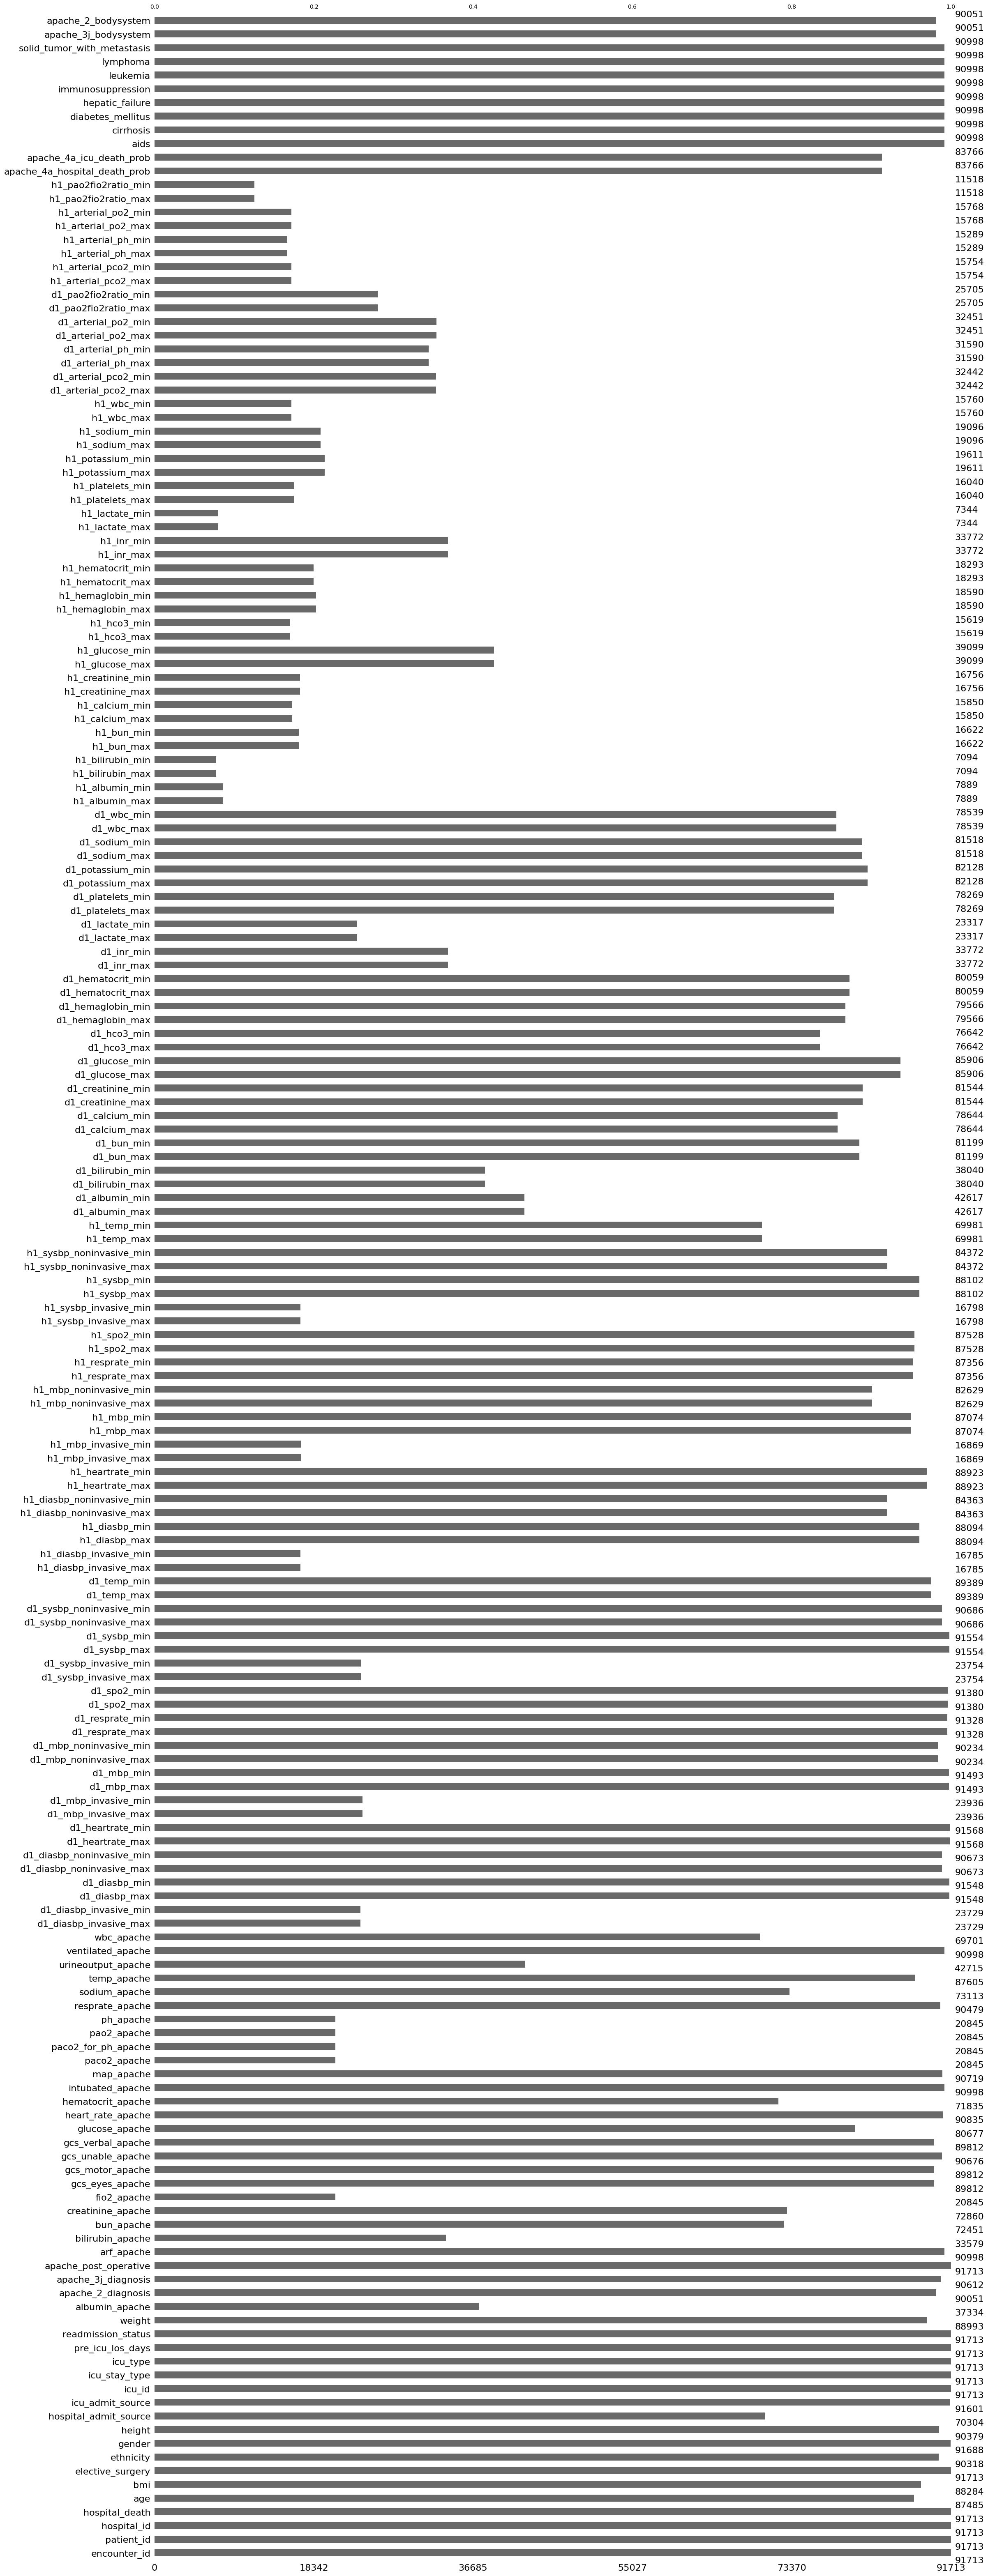

In [8]:
msno.bar(data)

We have so many columns with missing values.

In [9]:
data.isnull().any().sum()

175

175 columns have missing values. Let's see the number of rows with missing values.

In [10]:
data.isnull().any(axis=1).sum()

91688

Dropping columns which have greater missing values and some columns which won't help in prediction. Features with more than 25k missing values will be removed.

In [11]:
Drop_missing = data.isnull().sum(axis=0).sort_values(ascending=False)[data.isnull().sum(axis=0).sort_values(ascending=False) > 25000]

data.drop(Drop_missing.index.tolist() + ['encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status'],
              axis=1, inplace = True)
data

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,Med-Surg ICU,0.073611,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,72.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.0,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.0,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,78.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,NaN,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,55.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


We are still left with missing values.

In [12]:
# Removing missing values from inter-related columns
data = data[data[['bmi', 'weight', 'height']].isna().sum(axis=1) == 0]
data

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,0,67.0,27.560000,0,Caucasian,M,190.5,Med-Surg ICU,0.000694,100.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,72.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.0,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.0,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,78.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,NaN,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,55.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [13]:
data.select_dtypes(include='O')

,ethnicity,gender,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,CTICU,Cardiovascular,Cardiovascular
5,Caucasian,M,Med-Surg ICU,Neurological,Neurologic
...,...,...,...,...,...
91708,Caucasian,M,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Med-Surg ICU,Respiratory,Respiratory


In [14]:
data.select_dtypes(exclude='O')

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,25.0,31.950000,0,172.7,0.000694,95.3,122.0,703.03,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,81.0,22.640000,1,165.1,0.000694,61.7,203.0,1206.03,1,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,...,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,177.8,0.298611,72.9,113.0,501.06,0,...,0.12,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,0,56.0,47.179671,0,183.0,0.120139,158.0,113.0,501.05,0,...,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,0,48.0,27.236914,0,170.2,0.046528,78.9,123.0,702.01,0,...,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,0,NaN,23.297481,0,154.9,0.081944,55.9,108.0,203.01,0,...,0.07,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
numerical = [
 'elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

categorical = ['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']


In [16]:
data.nunique()[data.nunique() == 2].index.tolist()

['hospital_death',
 'elective_surgery',
 'gender',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [17]:
not_numeric = data[numerical + categorical + ['hospital_death']].columns.tolist()
numeric = data.drop(not_numeric, axis=1).columns.tolist()
numeric

['age',
 'bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_re

In [18]:
for col in numerical:
  data[col] = data[col].astype('Int64')

for col in numerical:
  data[col] = data[col].fillna(data[col].mode()[0])

In [19]:
data[numeric].isna().sum(axis=0).sort_values(ascending=False)

wbc_apache           21063
h1_temp_max          20833
h1_temp_min          20833
hematocrit_apache    19005
bun_apache           18289
                     ...  
d1_heartrate_min       108
bmi                      0
weight                   0
pre_icu_los_days         0
height                   0
Length: 84, dtype: int64

In [20]:
split_one = data[numeric].isna().sum(axis=0).sort_values()[data[numeric].isna().sum(axis=0) < 11000].index.tolist()
split_two = data[numeric].isna().sum(axis=0).sort_values()[data[numeric].isna().sum(axis=0) > 11000].index.tolist()

In [21]:
for col in split_two:
    data[col] = data[col].fillna(data[col].mean())

process_data = data.dropna(axis=0)

In [22]:
process_data[categorical].nunique()

ethnicity                6
gender                   2
icu_type                 8
apache_3j_bodysystem    11
apache_2_bodysystem     10
dtype: int64

In [23]:
# using one-hot encoder because of large range of **unique values** in categories

icu_data = pd.get_dummies(process_data, prefix='isin',
                          prefix_sep='_', columns=categorical,
                          drop_first=False)
icu_data.reset_index(drop = True, inplace = True)
icu_data

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,isin_Cardiovascular,isin_Gastrointestinal,isin_Haematologic,isin_Metabolic,isin_Neurologic,isin_Renal/Genitourinary,isin_Respiratory,isin_Trauma,isin_Undefined Diagnoses,isin_Undefined diagnoses
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,...,1,0,0,0,0,0,0,0,0,0
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,...,0,0,0,0,0,0,1,0,0,0
2,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,...,0,0,0,0,1,0,0,0,0,0
3,0,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,...,0,0,0,0,0,0,1,0,0,0
4,0,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53108,0,47.0,51.439842,1,195.0,0.033333,186.0,304.0,1406.01,1,...,0,1,0,0,0,0,0,0,0,0
53109,0,54.0,19.770448,0,177.8,0.025694,62.5,109.0,108.01,0,...,1,0,0,0,0,0,0,0,0,0
53110,0,75.0,23.060250,0,177.8,0.298611,72.9,113.0,501.06,0,...,1,0,0,0,0,0,0,0,0,0
53111,0,56.0,47.179671,0,183.0,0.120139,158.0,113.0,501.05,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
icu_data.columns = [x.lower() for x in icu_data.columns.tolist()]
icu_data = icu_data.loc[:,~icu_data.columns.duplicated()]

In [26]:
t = icu_data['arf_apache'].dtype
for col in tqdm(icu_data.columns.tolist()):
    if icu_data[col].values.dtype == 'uint8' or t == icu_data[col].values.dtype:
        icu_data[col] = icu_data[col].astype(int)

100%|██████████| 130/130 [00:00<00:00, 2049.19it/s]


In [27]:
icu_data.dtypes

hospital_death                int64
age                         float64
bmi                         float64
elective_surgery              int64
height                      float64
                             ...   
isin_trauma                   int64
isin_haematologic             int64
isin_neurologic               int64
isin_renal/genitourinary      int64
isin_undefined diagnoses      int64
Length: 130, dtype: object

In [28]:
icu_data['hospital_death']

0        0
1        0
2        0
3        0
4        0
        ..
53108    0
53109    0
53110    0
53111    0
53112    0
Name: hospital_death, Length: 53113, dtype: int64

In [29]:
# separating target and predictor variables
data_y = icu_data['hospital_death']
data_x = icu_data.drop('hospital_death',axis=1)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,  test_size=0.2, shuffle = True, random_state = 8)

In [31]:
X_train.shape, X_test.shape

((42490, 129), (10623, 129))

In [32]:
# Standardizing the train and test data

from sklearn.preprocessing import MinMaxScaler

# creating an instance for MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [33]:
# storing the normalized data into a new dataframe
X_train_new = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_new = pd.DataFrame(X_test_std, columns= X_test.columns)

In [34]:
model = Sequential()
# adding first layer and using relu as an activation function
model.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))
# adding second layer to the sequential model
model.add(Dense(32, activation='relu'))
# Adding third layer
model.add(Dense(16, activation='relu'))
# adding output layer to the model using sigmoid activation function which seems to be ideal for binary classification problem
model.add(Dense(1, activation='sigmoid'))

In [35]:
# printing the model summary just to get an idea about how many paramters are required for the current model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8320      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________


In [36]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=metrics)

In [37]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 [==============================] - 6s 3ms/step - loss: 0.2284 - precision: 0.6105 - recall: 0.1735 - auc: 0.8377 - val_loss: 0.2281 - val_precision: 0.6366 - val_recall: 0.2708 - val_auc: 0.8677
Epoch 2/20
1328/1328 [==============================] - 4s 3ms/step - loss: 0.2172 - precision: 0.6482 - recall: 0.2035 - auc: 0.8580 - val_loss: 0.2523 - val_precision: 0.7299 - val_recall: 0.1096 - val_auc: 0.8557
Epoch 3/20
1328/1328 [==============================] - 3s 3ms/step - loss: 0.2147 - precision: 0.6725 - recall: 0.2147 - auc: 0.8616 - val_loss: 0.2136 - val_precision: 0.7339 - val_recall: 0.1754 - val_auc: 0.8700
Epoch 4/20
1328/1328 [==============================] - 3s 3ms/step - loss: 0.2119 - precision: 0.7007 - recall: 0.2147 - auc: 0.8652 - val_loss: 0.2050 - val_precision: 0.7115 - val_recall: 0.2029 - val_auc: 0.8745
Epoch 5/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2098 - precision: 0.6900 - recall: 0.2374 - auc: 0.8685 - 

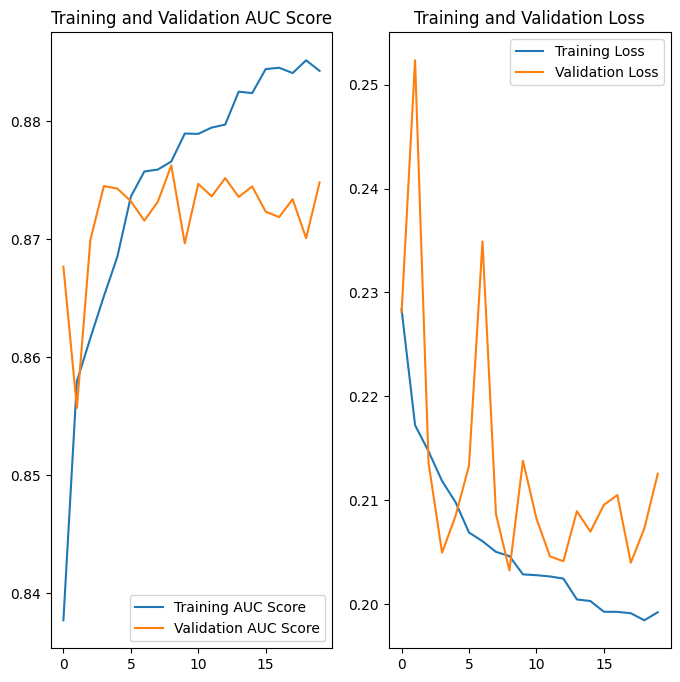

In [38]:
acc = history.history['auc']
val_acc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()